In [2]:
import pandas as pd

In [3]:
import numpy as np

In [61]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [13]:
data = pd.read_csv('data/raw_19.csv', index_col=0)

In [14]:
df2019 = data.copy()

In [15]:
df2019.columns

Index(['abstract', 'web_url', 'snippet', 'lead_paragraph', 'source',
       'multimedia', 'headline', 'keywords', 'pub_date', 'document_type',
       'news_desk', 'section_name', 'byline', 'type_of_material', '_id',
       'word_count', 'uri', 'print_section', 'print_page', 'subsection_name',
       'text'],
      dtype='object')

# <span style="color:red">convert string to datetime objects</span>



In [19]:
df2019.pub_date.unique()

array(['2019-01-01T00:00:03+0000', '2019-01-01T00:00:07+0000',
       '2019-01-01T00:15:31+0000', ..., '2019-12-31T23:05:04+0000',
       '2019-12-31T23:17:09+0000', '2019-12-31T23:52:00+0000'],
      dtype=object)

In [20]:
type(df2019.pub_date[0])

str

In [ ]:
histtype{'bar', 'barstacked', 'step', 'stepfilled'}

In [176]:
df2019.word_count.max()

20056

array([[<AxesSubplot:title={'center':'word_count'}>]], dtype=object)

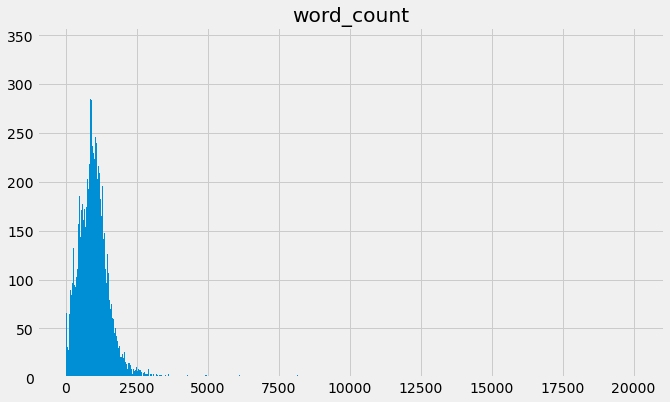

In [62]:
df2019.hist(bins=df2019.word_count.unique().shape[0],
            column='word_count', figsize=(10,6))

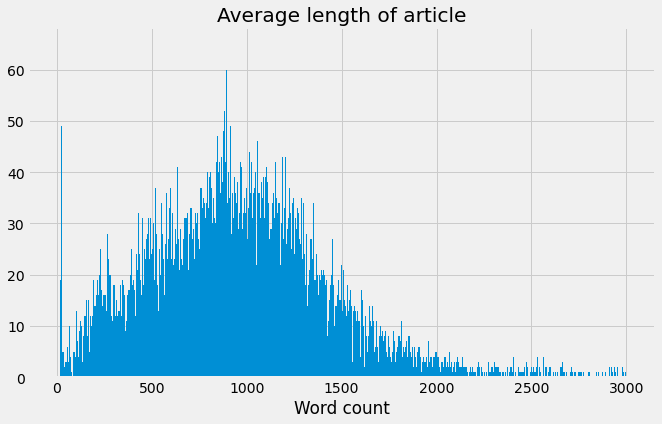

In [180]:
word_counts = df2019.word_count
bins = bins=df2019.word_count.unique().shape[0]

fix, ax = plt.subplots(figsize=(10,6))

ax.hist(word_counts,bins=3000, range=(0,3000))

ax.set_title("Average length of article")
plt.xlabel('Word count')

plt.savefig('hist_wordcount_2019');

In [63]:
df2019.word_count.unique().shape[0]

3081

<AxesSubplot:>

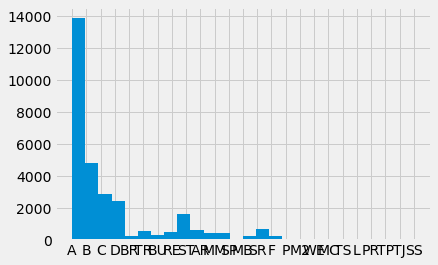

In [64]:
df2019.print_section.hist(bins=df2019.print_section.unique().shape[0])

<AxesSubplot:>

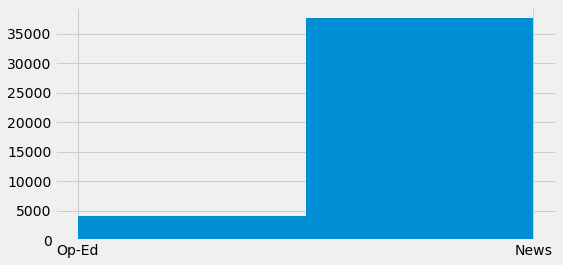

In [92]:
df2019.type_of_material.hist(bins=df2019.type_of_material.unique().shape[0], figsize=(8,4))

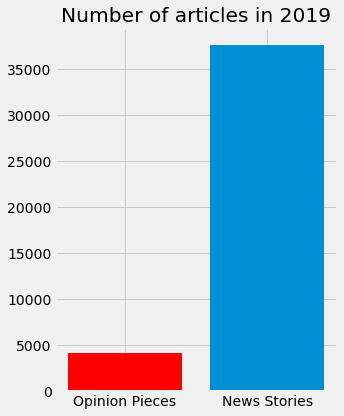

In [165]:
labels = ['Opinion Pieces', 'News Stories']
colors = ['red', 'blue']
data = df2019.type_of_material.value_counts().values[::-1]

fig, ax = plt.subplots(figsize=(5,6))

ax.bar(labels[0], data[0], color='red')
ax.bar(labels[1], data[1])

ax.set_title('Number of articles in 2019')

plt.tight_layout()
plt.savefig('num_opednews_2019');

In [124]:
a = df2019.type_of_material.value_counts()

In [134]:
df2019.type_of_material.unique()

array(['Op-Ed', 'News'], dtype=object)

array([37609,  4139])

# <span style="color:red">which page is an article on? can i predict which page a story is from?</span>

In [10]:
df2019.print_page.unique().shape

(3,)

In [11]:
pages_used = np.sort(df2019.print_page.unique())

In [12]:
pages_used

array([19., 21., nan])

# <span style="color:red">should I include all these subsections?</span>

In [13]:
#jan19df.subsection_name.unique()

In [14]:
#news = jan19df[jan19df['type_of_material'] == 'News']

In [15]:
#oped = jan19df[jan19df['type_of_material'] == 'Op-Ed']

In [16]:
#jan19df.word_count

In [17]:
#news.subsection_name.unique().shape[0]           

In [18]:
#news.subsection_name.hist(xrot=90, xlabelsize=15, figsize=(20,20), bins=(news.subsection_name.unique().shape[0]));

In [19]:
#oped.subsection_name.unique()

In [20]:
#oped.subsection_name.hist(xrot=90, xlabelsize=15, figsize=(20,20), bins=(oped.subsection_name.unique().shape[0]));

In [21]:
#jan19df.columns

# remove first and last words from text

In [22]:
# remove advertisement head and tail
def split_trim(string):
    text = string.split(" ")
    text = text[3:-14]
    return text
    
    

In [23]:
jan19df.word_count[0]

2248

In [24]:
sample = jan19df.text[0]

In [25]:
sample = sample.split(" ")

In [26]:
sample[-14:]

["'Follow",
 'The',
 'New',
 'York',
 'Times',
 'Opinion',
 'section',
 'on',
 'Facebook,',
 'Twitter',
 '(@NYTopinion)',
 'and',
 "Instagram.',",
 "'Advertisement']"]

In [38]:
jan19df.columns

Index(['abstract', 'web_url', 'snippet', 'lead_paragraph', 'source',
       'multimedia', 'headline', 'keywords', 'pub_date', 'document_type',
       'news_desk', 'section_name', 'byline', 'type_of_material', '_id',
       'word_count', 'uri', 'print_section', 'print_page', 'subsection_name',
       'text'],
      dtype='object')

In [114]:
jan19df.text[0][:500]

"['Advertisement', 'Supported by', 'From the Treaty of Versailles to Prohibition, the events of that year shaped America, and the world, for a century to come. ', 'By Ted Widmer', 'Mr. Widmer is a distinguished lecturer at the Macaulay Honors College of the City University of New York.', 'Throughout 2019, The New York Times Opinion section will publish an occasional series of essays on the ways in which the events of 1919 shaped the following century. ', 'In his essay “The Crack-Up,” F. Scott Fit"

In [40]:
jan19df.abstract[0]

'From the Treaty of Versailles to Prohibition, the events of that year shaped America, and the world, for a century to come. '

In [41]:
jan19df.snippet[0]

'From the Treaty of Versailles to Prohibition, the events of that year shaped America, and the world, for a century to come. '

In [42]:
jan19df.lead_paragraph[0]

'Throughout 2019, The New York Times Opinion section will publish an occasional series of essays on the ways in which the events of 1919 shaped the following century. '

In [43]:
jan19df.web_url[0]

'https://www.nytimes.com/2018/12/31/opinion/1919-america.html'

In [44]:
jan19df.byline[0]

"{'original': 'By Ted Widmer', 'person': [{'firstname': 'Ted', 'middlename': None, 'lastname': 'Widmer', 'qualifier': None, 'title': None, 'role': 'reported', 'organization': '', 'rank': 1}], 'organization': None}"

In [45]:
#split by df.lead_paragraph or other column to get better parse of articles!

In [48]:
lead_paragraph = jan19df.lead_paragraph[0]

In [49]:
lead_paragraph

'Throughout 2019, The New York Times Opinion section will publish an occasional series of essays on the ways in which the events of 1919 shaped the following century. '

In [50]:
byline = jan19df.byline[0]

In [56]:
(byline)

"{'original': 'By Ted Widmer', 'person': [{'firstname': 'Ted', 'middlename': None, 'lastname': 'Widmer', 'qualifier': None, 'title': None, 'role': 'reported', 'organization': '', 'rank': 1}], 'organization': None}"

In [57]:
import ast

In [65]:
byline = ast.literal_eval(byline)

In [67]:
byline['original']

'By Ted Widmer'

In [91]:
person = byline['person']

In [108]:
person[0]['firstname']

'Ted'

In [35]:
type_text = jan19df[['type_of_material', 'text']]

In [36]:
type_text.to_csv('type_text.csv')